In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv('fetal_health.csv')
print(data.shape)
data.head()

(2126, 22)


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


In [3]:
# 数据基本信息
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [4]:
# 数据清洗过程，无缺失值，13个重复值，不太需要看异常值
sum(data.duplicated())

13

In [5]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [6]:
data = data.drop_duplicates()
print(data.shape)

(2113, 22)


<Axes: xlabel='fetal_health', ylabel='count'>

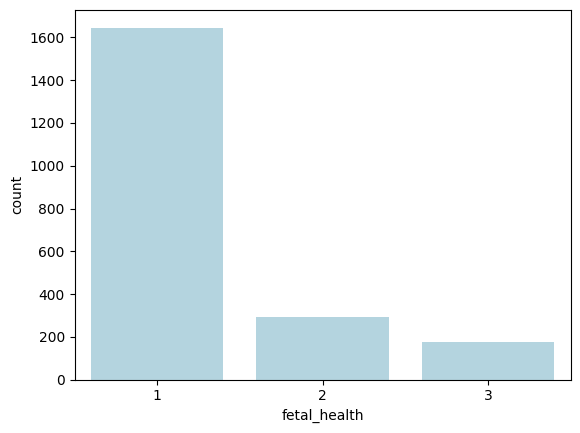

In [7]:
# 探索性数据分析
# 先看target的分布情况
sns.countplot(x = data['fetal_health'], color = 'lightblue')

<Axes: >

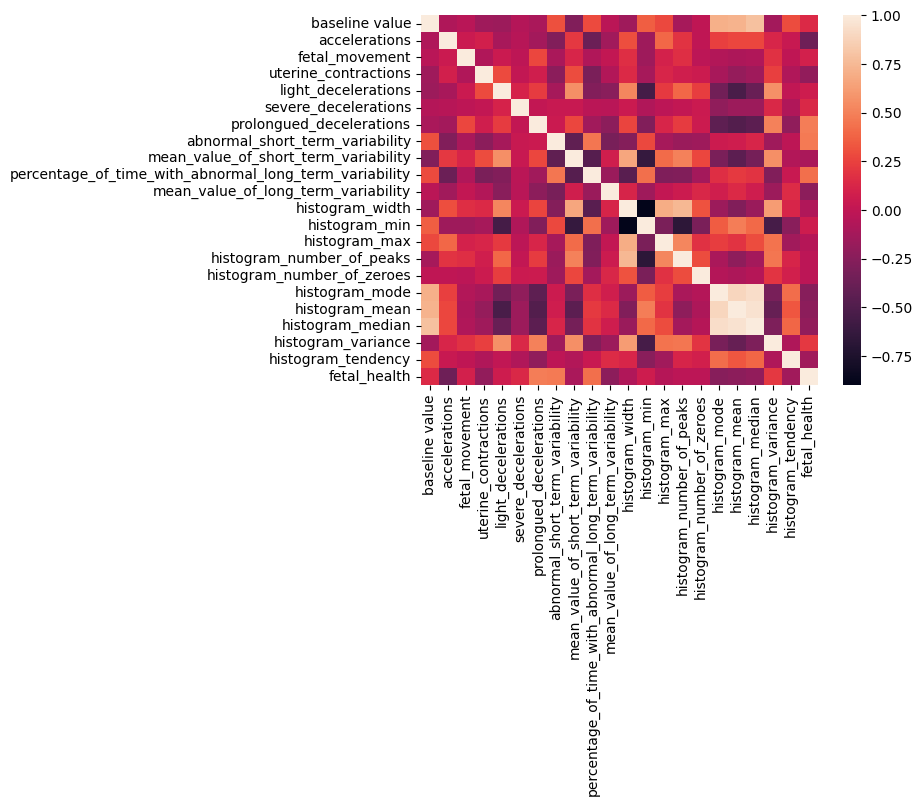

In [8]:
# 再看各变量各目标变量的关系
sns.heatmap(data.corr())

In [13]:
# 建模1：xgboost，并调参
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [10]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]
# 数据标准化
X = X.apply(lambda x: (x-min(x))/(x.max()-x.min()))
Y = Y - 1
X_train,X_test,y_train,y_test=train_test_split(X,Y,
                                              test_size=0.3,
                                              random_state=2024)

best_score_: {'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100} 0.9519880897847
混淆矩阵


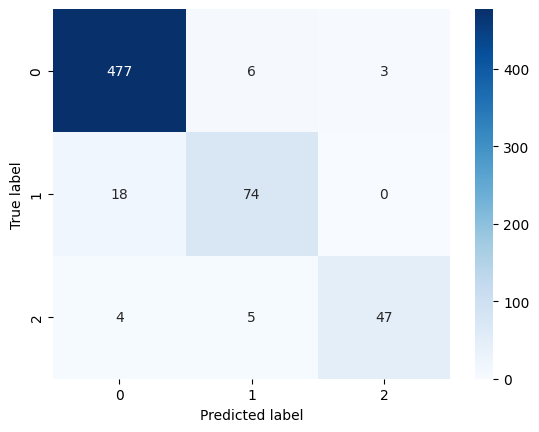

精度:
0.94212502198682
召回：
0.943217665615142
F1得分：
0.9421001570326905


In [29]:
# 建模并调参
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

param_grid = {
            'max_depth': [5, 6, 7],
            'n_estimators': [50, 100, 300],
            'learning_rate': [0.01, 0.02, 0.05, 0.1],
            "gamma":[0.0, 0.1, 0.2],
}


gsearch = GridSearchCV(estimator = XGBClassifier(eval_metric = 'mlogloss'), param_grid=param_grid, cv=5)
gsearch.fit(X_train, y_train)
print("best_score_:", gsearch.best_params_, gsearch.best_score_)
y_pred= gsearch.predict(X_test)
print('混淆矩阵')
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
sns.heatmap(cm, annot=True, fmt='.20g', cmap=plt.cm.Blues) 
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print('精度:')
print(precision_score(y_test, y_pred, average='weighted'))
print('召回：')
print(recall_score(y_test, y_pred, average='weighted'))
print('F1得分：')
print(f1_score(y_test, y_pred, average='weighted'))

In [19]:
# 建模2：MLP，并调参
# 参考https://github.com/percent4/PyTorch_Learning
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [67]:
class MLP(Module):
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        self.hidden1 = Linear(n_inputs, 64)
        self.dropout = nn.Dropout(p = 0.8)
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()
        self.hidden2 = Linear(64, 128)
        self.dropout = nn.Dropout(p = 0.3)
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        self.hidden3 = Linear(128, 64)
        self.dropout = nn.Dropout(p = 0.3)
        kaiming_uniform_(self.hidden3.weight, nonlinearity='relu')
        self.act3 = ReLU()
        self.hidden4 = Linear(64, 16)
        self.dropout = nn.Dropout(p = 0.3)
        kaiming_uniform_(self.hidden4.weight, nonlinearity='relu')
        self.act4 = ReLU()
        self.hidden5 = Linear(16, 3)
        self.dropout = nn.Dropout(p = 0.3)
        xavier_uniform_(self.hidden5.weight)
        self.act5 = Softmax(dim=1)

    def forward(self, X):
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.hidden2(X)
        X = self.act2(X)
        X = self.hidden3(X)
        X = self.act3(X)
        X = self.hidden4(X)
        X = self.act4(X)
        X = self.hidden5(X)
        X = self.act5(X)
        return X

第0个epoch后的loss:
tensor(1.1618, grad_fn=<NllLossBackward0>)
第100个epoch后的loss:
tensor(0.7671, grad_fn=<NllLossBackward0>)
第200个epoch后的loss:
tensor(0.7671, grad_fn=<NllLossBackward0>)
第300个epoch后的loss:
tensor(0.7671, grad_fn=<NllLossBackward0>)
第400个epoch后的loss:
tensor(0.7671, grad_fn=<NllLossBackward0>)
第500个epoch后的loss:
tensor(0.7671, grad_fn=<NllLossBackward0>)
第600个epoch后的loss:
tensor(0.7671, grad_fn=<NllLossBackward0>)
第700个epoch后的loss:
tensor(0.7671, grad_fn=<NllLossBackward0>)
第800个epoch后的loss:
tensor(0.7671, grad_fn=<NllLossBackward0>)
第900个epoch后的loss:
tensor(0.7671, grad_fn=<NllLossBackward0>)
混淆矩阵


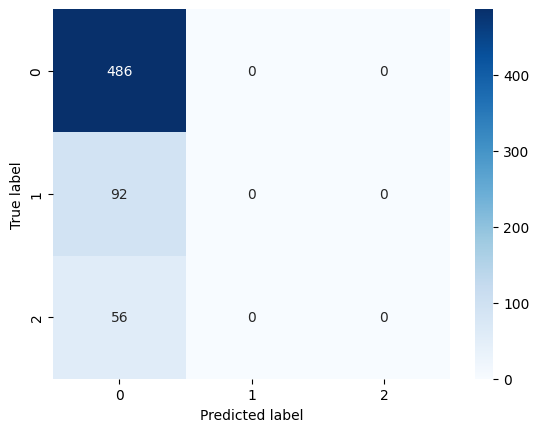

精度:
0.5876165550458259
召回：
0.7665615141955836
F1得分：
0.6652658855340244


d:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [68]:
loss_lst = []
x = torch.from_numpy(np.array(X_train)).type(torch.FloatTensor)
y = torch.from_numpy(np.array(y_train)).type(torch.LongTensor)

net = MLP(21)  
optimizer = torch.optim.Adam(net.parameters(), lr=0.05) 
loss_func = torch.nn.CrossEntropyLoss() 

for t in range(1000):
    try:
        out = net(x)   
    except: 
        print('运行失败，请检查输入维度和网络参数维度是否一致')              
    loss = loss_func(out, y)   
    if np.isnan(loss.item()):
        raise ValueError('模型损失为空，请检查输入是否为空，也有可能出现了梯度爆炸')
        break 
    optimizer.zero_grad()  
    loss.backward()        
    optimizer.step()      
    loss_lst.append(loss)
    if t % 100 == 0:
        print(f'第{t}个epoch后的loss:')
        print(loss)

x_test = torch.from_numpy(np.array(X_test)).type(torch.FloatTensor)
y_test = torch.from_numpy(np.array(y_test)).type(torch.LongTensor)

out = net(x_test) 
prediction = torch.max(out, 1)[1] 
y_pred = prediction.data.numpy()
y_test = y_test.data.numpy()

print('混淆矩阵')
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
sns.heatmap(cm, annot=True, fmt='.20g', cmap=plt.cm.Blues) 
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print('精度:')
print(precision_score(y_test, y_pred, average='weighted'))
print('召回：')
print(recall_score(y_test, y_pred, average='weighted'))
print('F1得分：')
print(f1_score(y_test, y_pred, average='weighted'))

In [28]:
# 过采样
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
y_train_res.value_counts()

fetal_health
0    1160
1    1160
2    1160
Name: count, dtype: int64

best_score_: {'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300} 0.9813218390804597
混淆矩阵


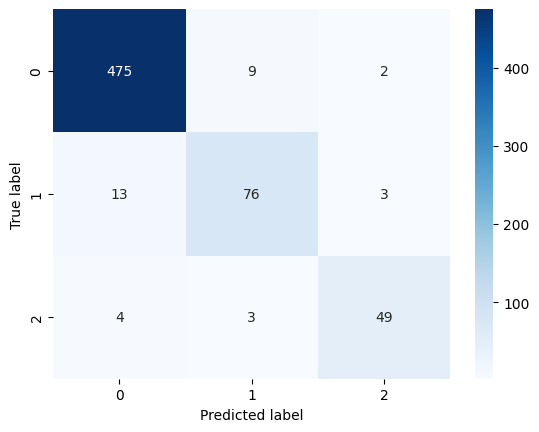

精度:
0.9455468096885346
召回：
0.9463722397476341
F1得分：
0.9458449330447164


In [31]:
# xgboost
param_grid = {
            'max_depth': [5, 6, 7],
            'n_estimators': [50, 100, 300],
            'learning_rate': [0.01, 0.02, 0.05, 0.1],
            "gamma":[0.0, 0.1, 0.2],
}


gsearch = GridSearchCV(estimator = XGBClassifier(eval_metric = 'mlogloss'), param_grid=param_grid, cv=5)
gsearch.fit(X_train_res, y_train_res)
print("best_score_:", gsearch.best_params_, gsearch.best_score_)
y_pred= gsearch.predict(X_test)
print('混淆矩阵')
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
sns.heatmap(cm, annot=True, fmt='.20g', cmap=plt.cm.Blues) 
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print('精度:')
print(precision_score(y_test, y_pred, average='weighted'))
print('召回：')
print(recall_score(y_test, y_pred, average='weighted'))
print('F1得分：')
print(f1_score(y_test, y_pred, average='weighted'))

In [62]:
class MLP(Module):
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        self.hidden1 = Linear(n_inputs, 64)
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()
        self.hidden2 = Linear(64, 128)
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        self.hidden3 = Linear(128, 64)
        kaiming_uniform_(self.hidden3.weight, nonlinearity='relu')
        self.act3 = ReLU()
        self.hidden4 = Linear(64, 16)
        kaiming_uniform_(self.hidden4.weight, nonlinearity='relu')
        self.act4 = ReLU()
        self.hidden5 = Linear(16, 3)
        xavier_uniform_(self.hidden5.weight)
        self.act5 = Softmax(dim=1)

    def forward(self, X):
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.hidden2(X)
        X = self.act2(X)
        X = self.hidden3(X)
        X = self.act3(X)
        X = self.hidden4(X)
        X = self.act4(X)
        X = self.hidden5(X)
        X = self.act5(X)
        return X

第0个epoch后的loss:
tensor(1.1448, grad_fn=<NllLossBackward0>)
第100个epoch后的loss:
tensor(0.1161, grad_fn=<NllLossBackward0>)
第200个epoch后的loss:
tensor(0.0575, grad_fn=<NllLossBackward0>)
第300个epoch后的loss:
tensor(0.0206, grad_fn=<NllLossBackward0>)
混淆矩阵


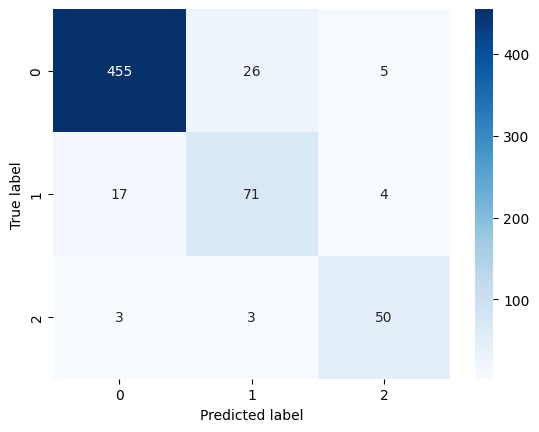

精度:
0.912167932529822
召回：
0.9085173501577287
F1得分：
0.9100085731637935


In [61]:
# 调参过程：先调网络层数，再调学习率，看loss，发现loss已经很小了，于是根据Loss做了早停

loss_lst = []
x = torch.from_numpy(np.array(X_train_res)).type(torch.FloatTensor)
y = torch.from_numpy(np.array(y_train_res)).type(torch.LongTensor)

net = MLP(21)  
optimizer = torch.optim.Adam(net.parameters(), lr=0.01) 
loss_func = torch.nn.CrossEntropyLoss() 

for t in range(1000):
    try:
        out = net(x)   
    except: 
        print('运行失败，请检查输入维度和网络参数维度是否一致')              
    loss = loss_func(out, y)   
    if np.isnan(loss.item()):
        raise ValueError('模型损失为空，请检查输入是否为空，也有可能出现了梯度爆炸')
        break 
    optimizer.zero_grad()  
    loss.backward()        
    optimizer.step()      
    loss_lst.append(loss)
    if loss < 0.01:
        break
    if t % 100 == 0:
        print(f'第{t}个epoch后的loss:')
        print(loss)

x_test = torch.from_numpy(np.array(X_test)).type(torch.FloatTensor)
y_test = torch.from_numpy(np.array(y_test)).type(torch.LongTensor)

out = net(x_test) 
prediction = torch.max(out, 1)[1] 
y_pred = prediction.data.numpy()
y_test = y_test.data.numpy()

print('混淆矩阵')
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
sns.heatmap(cm, annot=True, fmt='.20g', cmap=plt.cm.Blues) 
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print('精度:')
print(precision_score(y_test, y_pred, average='weighted'))
print('召回：')
print(recall_score(y_test, y_pred, average='weighted'))
print('F1得分：')
print(f1_score(y_test, y_pred, average='weighted'))